<a href="https://colab.research.google.com/github/dheerajjoshim/machinelearningcourse/blob/master/DBSCAN_ForestType_EDP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Upload to Google Colab

from google.colab import files
uploaded = files.upload()

Saving ForestType.csv to ForestType.csv


In [3]:
# Read the dataset

df = pd.read_csv("ForestType.csv")
df.head()

,b1,b2,b3
0,39,36,57
1,84,30,57
2,53,25,49
3,59,26,49
4,57,49,66


In [4]:
df.shape

(198, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   b1      198 non-null    int64
 1   b2      198 non-null    int64
 2   b3      198 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [6]:
# Check for Null values

df.isnull().sum()

b1    0
b2    0
b3    0
dtype: int64

In [7]:
# have a look on the dataset details

df.describe()

,b1,b2,b3
count,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768
std,12.779563,17.832543,17.314545
min,34.000000,25.000000,47.000000
25%,54.000000,28.000000,52.000000
50%,60.000000,31.500000,57.000000
75%,70.750000,50.750000,69.000000
max,105.000000,160.000000,196.000000


In [8]:
# Outlier check

df[ df['b3'] > 63.676768 + 3*17.314545 ]

,b1,b2,b3
90,81,98,125
93,105,160,196


### Scatter plot data

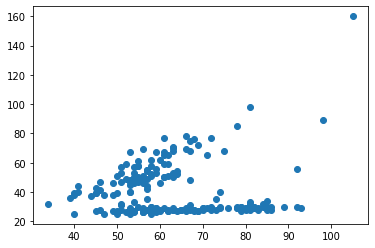

In [9]:
# plt.scatter(df.b1,df.b2,df.b3)
plt.scatter(df.b1,df.b2)

### Call DBSCAN method passing epsilon and min sample as argument to form a cluster

In [10]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 6.5 , min_samples=5).fit(df)
# model = DBSCAN(eps = 6.7).fit(df)

In [12]:
labels=model.labels_
print(type(labels))

<class 'numpy.ndarray'>


### # DBSCAN forms cluster automattically, check how many clusters are formed

In [13]:
print(len(set(labels)))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

4
3


### # Check clusters lables

In [14]:
labels=model.labels_
print(labels)

[ 1  0  0  0  1  0  0  1  0  1 -1 -1  1  1  0  1  2  1  0  0 -1  1  0  0
  1  0 -1  1  1  1  1  0  2  0  1  1 -1  0  2  1  1  1  0  0  0  1  1  2
  1  0  1  0  0  0  0  0  1  1  0  0  1  1  1  2  0  0  0  1  1  0  1 -1
  2  0  0  0  1  1  0  0  1  1  2  0 -1  0  1  1  0  2 -1  0  2 -1  1  0
  2  0  2  0  1  2  0  0  0  0  0  1  0  0  1  1  1  1  0 -1  0  0  0  0
  0  0  1  1  0  0  0  0  0  1  0  0  1  0  0  0 -1  0  1  0  0  0  0  0
  0  1  1  0  0  1  0  0  0  1  1  1  0 -1  1  0  2  1  2  0  1  0  0  0
  2  1  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  2  1  0  0  0  0
  0  2  2  0  0  0]


## Create dataframe for each clusters and outlier 

In [15]:
df1 = df[model.labels_ == 0]
df2 = df[model.labels_ == 1]
df3 = df[model.labels_ == 2]
#df4 = df[model.labels_ == 3]
df5 = df[model.labels_ == -1]

## Scatter plot all clusters

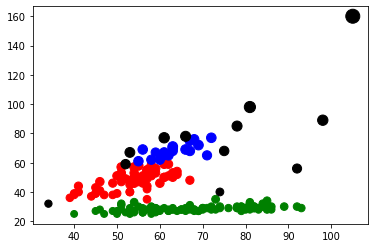

In [16]:
plt.scatter(df1.b1,df1.b2, df1.b3, color='green')
plt.scatter(df2.b1,df2.b2, df2.b3, color='red')
plt.scatter(df3.b1,df3.b2, df3.b3, color='blue')
#plt.scatter(df4.b1,df4.b2, df4.b3, color='yellow')
plt.scatter(df5.b1,df5.b2, df5.b3, color='black')

## End

### Generic python code to choose best value of eps and minimum samples

In [28]:
# Find optimal value of eps

for ep in np.arange(1,10):
    print("ep - " + str(ep))
    model = DBSCAN(eps = ep, min_samples=4).fit(df)
    labels=model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1) 
    print ("  eps : "+str(ep) +" No. of cluster : "+str(n_clusters_) + " Outliers : "+str(n_noise_))

ep - 1
  eps : 1 No. of cluster : 4 Outliers : 181
ep - 2
  eps : 2 No. of cluster : 5 Outliers : 108
ep - 3
  eps : 3 No. of cluster : 4 Outliers : 68
ep - 4
  eps : 4 No. of cluster : 5 Outliers : 50
ep - 5
  eps : 5 No. of cluster : 4 Outliers : 31
ep - 6
  eps : 6 No. of cluster : 4 Outliers : 16
ep - 7
  eps : 7 No. of cluster : 2 Outliers : 10
ep - 8
  eps : 8 No. of cluster : 1 Outliers : 6
ep - 9
  eps : 9 No. of cluster : 1 Outliers : 6
